[![](xkcd-matrix.jpg){width=500 fig-align="center"}](https://xkcd.com/566/)

The most important thing about reading this blog post is to not get scared off by the formulas. The post may look like all the crap you normally skim over, so you may be tempted to skim over this one. Don't! __None of this is hard.__ Just read the post top to bottom, and I promise you every individual step and the whole thing put together will make sense.

## Highschool math

In hight school your math teacher may have started a treatment of linear algebra by making you solve a system of linear equations, at which point you very sensibly zoned out because you knew you'd go on to program computers and never have to solve a system of linear equations again (don't worry, I won't be talking much about them here).

$$
\begin{eqnarray}
0x_1 + 1x_2 = 0\\
-1x_1 - 0x_2 = 0
\end{eqnarray}
\tag{1}
$$

You also may have learned that for some reason you can take the coefficients and put them in a 2D array like this:
$A=\begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}$.
You've now defined a matrix $A$, and you can re-express the system of linear equations above as follows:

$$
\newcommand\qvec[1]{\begin{bmatrix}#1\end{bmatrix}}
A\qvec{x_1\\x_2}=0
\tag{2}
$$

If you're _really_ hellbent on cleaning things up, you can express the vector $\qvec{x_1, x_2}$ as $x=\qvec{x_1 \\ x_2}$, which now gives you a really clean equation:

$$
Ax=0
\tag{3}
$$

Equations 1 - 3 are just different ways to say the exact same thing. In different situations you may prefer one notation over another, but there is no material difference between them. They are all equivalent.

## Matrix-vector multiplication

I'll talk about what matrix-vector multiplication _means_ in a moment. For now let's look at how the operation is defined. The precise definition of matrix-vector multiplication flows out of the notation above, so you never again have to look it up on wikipedia. If you need to multiply a matrix by a vector, say $\begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}
\qvec{1 \\ 2}$, just recall that this is equivalent to the left side of the system of equations above. Before, we took the coefficients in the linear equation system and factored them out into a 2D array. Now we reverse the procedure-- take our 2D array and factor it back in as coefficients:

$$
\qvec{
0*1 + 1*2\\
-1*1 - 0*2
}=\qvec{2 \\ -1}
$$

If you forget how matrix-vector multiplication works, just remember that its definition flows out of the notation. Convert the matrix-vector multiplication notation back into the linear equation system notation again, and you get the matrix-vector multiplication formula.

You may remember from high school that there is an operation defined on vectors called the dot product. The dot product is the sum of pairwise multiplication of elements of two vectors. E.g. $\qvec{0, 1}\cdot\qvec{1, 2}=0*1 + 1*2=2$. The dot product of two vectors is an operation that represents the degree to which the two vectors point in the same direction.

That's simple enough. But here is something curious. Another way to think of matrix-vector multiplication is by treating each row of a matrix as its own vector, and computing the dot products of these row vectors with the vector we're multiplying by (in this case $\qvec{1, 2}$). How on earth does that work?! What does vector similarity have to do with linear equations, or with matrix-vector multiplication? I cannot answer this question quite yet. But we'll eventually build up to an answer in future posts.

## Matrices as functions

Now let's look at what matrix-vector multiplication means. This blew my mind when I first learned about it. You can think of a matrix as a function, and you can think of multiplying a matrix by a vector as applying that function to the vector. So when you see $Ax$, autocomplete it in your head to "calling some function $A$ with argument $x$".

This is actually not so strange-- you can think of many structures as functions. For example, you can think of a number $3$ as a function. When you multiply it by things, it makes them three times bigger. Thinking about matrices this way happens to be very convenient.

The fact that $Ax=0$ denotes both the linear system in equation 1, and a call to a function $A$ with argument $x$ (getting the zero vector in return) leads to a curious insight about the relationship between high school math and programming.

In high school you're given equations and asked to find their roots. We already established that a system of equations is equivalent to matrix-vector multiplication, which can be thought of as function application. And so, in high school you're _given_ a function $A$ along with its output, and asked to _find the inputs that match that output_. Programming is usually the exact opposite. In programming what you're _given_ is the shape of inputs and outputs, and your job is to _construct a function_ $A$ that converts inputs to desired outputs. The computer then executes the functions you construct, often at scale.

So it turns out that solving systems of linear equations in high school math classes and writing React code in your day job are two sides of the same coin! It's a complicated idea, so it takes a while to wrap your head around its implications (and its limitations). Illuminating this relationship in much more depth is another thing I hope to accomplish with these series of posts.

## What does $\begin{bmatrix}0 & 1 \\ -1 & 0 \\ \end{bmatrix}$ do?

Going back to our lowly 2x2 matrix $A=\begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}$, let's consider what this matrix does. Taking an equally lowly vector $x=\qvec{0, 1}$ and multiplying $A$ by $x$, we get $Ax=\qvec{1, 0}$. Let's do this a few more times:

$$
\begin{aligned}
&A\qvec{1 \\ 0}=\qvec{0, -1}\\
&A\qvec{0 \\ -1}=\qvec{-1, 0}\\
&A\qvec{-1 \\ 0}=\qvec{0, 1}
\end{aligned}
$$

After the fourth operation we're back where we started. Plotting this we get:

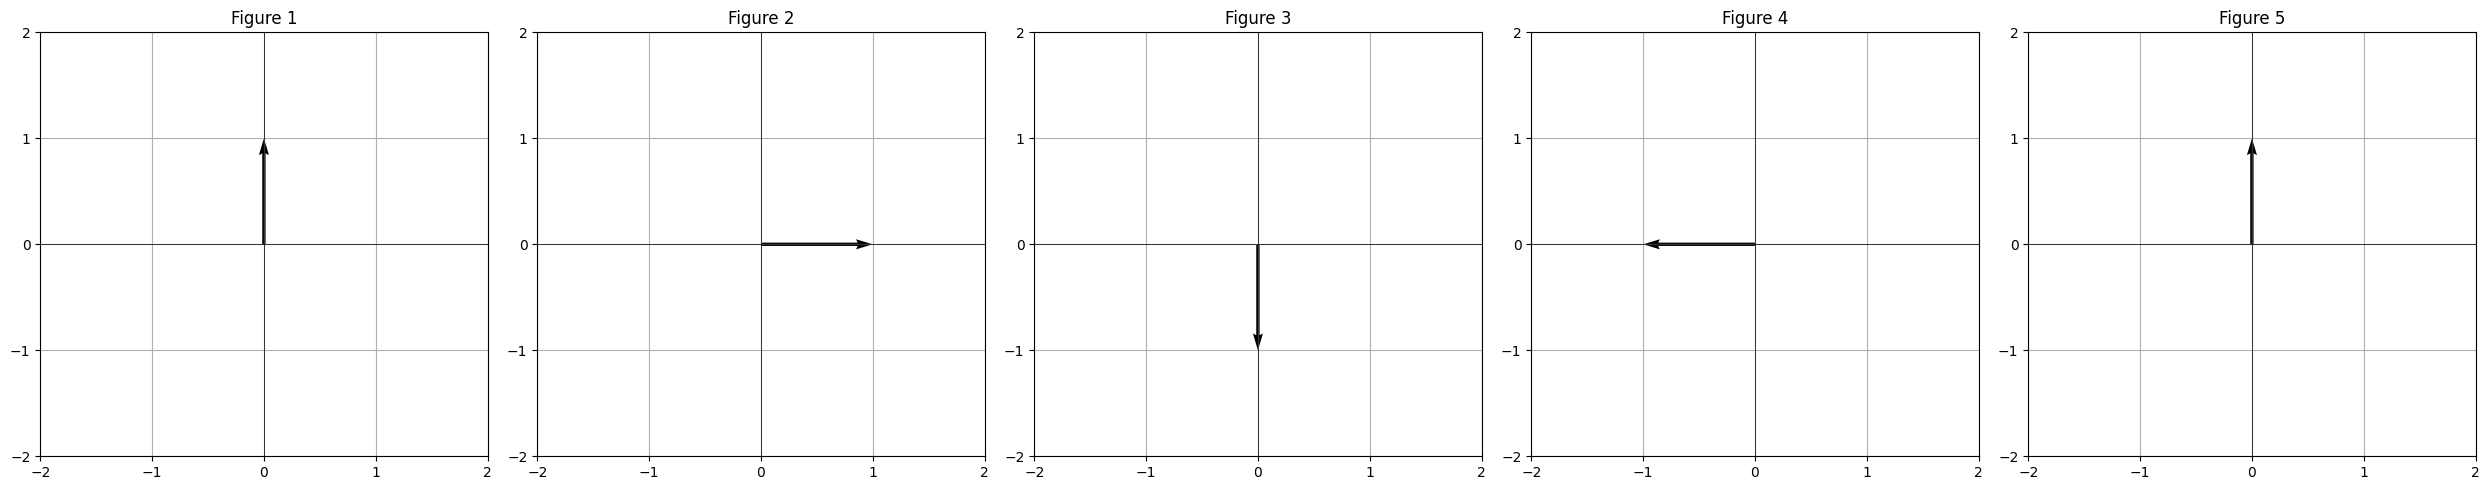

In [22]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
vecs = [[0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]]

for i in range(len(vecs)):
    axs[i].quiver(0, 0, vecs[i][0], vecs[i][1], angles='xy', scale_units='xy', scale=1)
    axs[i].axhline(0, color='black',linewidth=0.5)
    axs[i].axvline(0, color='black',linewidth=0.5)
    axs[i].set_title(f"Figure {i+1}")
    axs[i].grid(True)
    axs[i].xaxis.set_ticks(np.arange(-2, 3, 1))
    axs[i].yaxis.set_ticks(np.arange(-2, 3, 1))

plt.tight_layout()
plt.show()

So the matrix $A$ performs a clockwise rotation on its input vector by 90 degrees! How does that work? Suppose we had to write a normal Python function to do a clockwise 90 degree rotation:

In [33]:
def rotate(vec):
    x, y = vec
    return [y, -x]

[rotate([0, 1]),
 rotate([1, 0]),
 rotate([0, -1]),
 rotate([-1, 0])]

[[1, 0], [0, -1], [-1, 0], [0, 1]]

These are the same results that we got by matrix multiplication. It helps to tinker with matrix-vector multiplication by hand to internalize how it works. Can you write a matrix that rotates its input counterclockwise? How about one that rotates by 45 degrees? A matrix that returns its input as is?

## Matrix-matrix multiplication

In highschool your teacher also gave you a bunch of rules for how to multiply matrices by each other, and then, if you're lucky, maybe explained what matrix-matrix multiplication means. I always thought it's a silly way of teaching it. Where did the rules come from? Did Moses bring them down from mount Sinai on stone tablets?

Instead, let's do it the sensible way and put the horse before the cart. Knowing what we know, if _we_ were tasked with defining matrix multiplication, what would we _want it to do_? What could be a reasonable definition?

We've seen in the previous section that $A$ rotates its input vector clockwise by 90 degrees. Of course when we apply $A$, take the resulting vector, and apply $A$ again, _that_ gets rotated by 90 degrees. So applying $A$ twice rotates the _original_ input clockwise by 180 degrees. Mathematically, we can express it like this: $A(Ax)$. We perform matrix-vector multiplication $Ax$ which produces a vector, we take that vector, and perform matrix-vector multiplication on that.

Normally in math we want the multiplication operation to associate. It would be strage if the result of $2*(2*3)$ were different from $(2*2)*3$. So it's sensible to apply this principle to matrices and make _their_ multiplication associative. In other words, we want the following equation to be true:
$$
A(Ax)=(AA)x
$$

Since $A(Ax)$ rotated $x$ clockwise by 180 degrees, ideally $AA$ would be a matrix that does exactly the same thing. To put it more generally, if matrix $A$ performs some operation, and another matrix $B$ performs a different operation, we want the matrix $M=AB$ to perform both of those operations one after another. A different way of putting it is that if we think of matrices as functions, we want matrix multiplication to act in the same way as function composition.

This is exactly what matrix multiplication does. The derivation is a little bit messy, so instead of doing it inline I added it an [appendix](#appendix-matrix-matrix-multiplication-derivation) at the end of this post. If you forget why matrix-matrix multiplication is defined the way it is, you can always come back to this explanation.

## Type systems

Let's look at another example of matrix-vector multiplication, this time with a non-square matrix:

$$\begin{bmatrix}
0 & 1 \\
-1 & 0 \\
0 & 0
\end{bmatrix}
\qvec{1 \\ 2}
=\qvec{2 \\ -1 \\ 0}$$

Let's call this matrix on the left $M$. In the equation above we get our result by performing the dot product of $\qvec{1, 2}$ with every row of $M$. In other words, we treat each row of $M$ as a vector, perform a pairwise multiplication of its elements with $\qvec{1, 2}$, and sum them.

Now here is something interesting. Since you can't perform a dot product of two vectors with different dimensions, for matrix-vector multiplication to work the number of elements in $\qvec{1, 2}$ must be equal to the number of columns in $M$. Switching to thinking of $M$ as a function, _we've now learned something about the type of its input_. $M$'s arguments _must_ be vectors of two dimensions.

The opposite is true for $M$'s rows. Because we perform a dot product of $\qvec{1, 2}$ with every row of $M$ and $M$ has three rows, the output vector must necessarily have three elements. And so, the number of rows in $M$ tells us about the type of its output.

Here is a simple way of expressing this in typescript:

```ts
// Columns are the input; rows are the output
type mC = [number, number];
type mR = [number, number, number];
type M = (in: mC) -> mR;
```

Now let's consider how types for matrix multiplication work. Suppose we have a different matrix $N$, and we'd like to multiply $N$ by $M$. What must the type of the matrix $N$ be? Well, if we look at a term $NMx$, $M$'s output becomes $N$'s input. Thefore, $N$'s input and $M$'s output must be of the same type. In other words, $N$'s number of columns must be the same as $M$'s number of rows:

```ts
type N = (in: mR) -> any;
```

When you think about which matrices can and cannot be multiplied by each other, it's actually quite simple-- the output of one matrix (its rows) must have the same dimension as the input of another (its columns). If you get confused about that, perhaps writing it out in typescript notation will help!

## What's next?

This post should give you a basic intuition for what matrices are and how they work. However, we've just scrated the surface. Here are some interesting questions for you to consider:

- You saw we can treat rows of a matrix as vectors. What is the intuitive meaning of these row vectors?
- This (correctly) suggests we can also treat matrix columns as vectors. What is the intuitive meaning of column vectors?
- If we think of a matrix $A$ as a function, can we look at it and tell which inputs result in the output of zero? In other words, how do we solve $Ax=0$?
- We know matrix multiplication can be thought of as composing two functions into a single function. Can we do the opposite and break up a matrix into multiple smaller functions? How? And what would these smaller functions do?
- What the heck are determinants, eigenvectors, and eigenvalues?

To start answering these questions, in the next part I plan to cover linear combinations, vector spaces, linear maps, and linear independence. Stay tuned!

## Appendix: matrix-matrix multiplication derivation

Coming back to matrix-matrix multiplication, we've already established that we want $(AB)x=A(Bx)$. Let's look at how to derive the multiplication definition from this equation. Rather than do it generally, I'll do it for a 2x2 example, but exactly the same principle applies to matrices of other sizes.

Let 
$A=\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix}$, let 
$B=\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
\end{bmatrix}$, and let $x=\qvec{x_1 \\ x_2}$. Now let's look at $A(Bx)$. Doing matrix-vector multiplication $Bx$ we get:

$$
Bx=\qvec{x_1b_{11} + x_2{b12} \\ x_1b_{21}+x_2b_{22}}
$$

That's a vector, and we already know how to multiply a matrix by a vector, so we do it again (and get a slightly messy result):

$$
\begin{aligned}
A(Bx)
&=\qvec{
  a_{11}(x_1b_{11} + x_2b_{12}) + a_{12}(x_1b_{21} + x_2b_{22}) \\
  a_{21}(x_1b_{11} + x_2b_{12}) + a_{22}(x_1b_{21} + x_2b_{22})}\\
&=\qvec{
  x_1a_{11}b_{11} + x_2a_{11}b_{12} + x_1a_{12}b_{21} + x_2a_{12}b_{22} \\
  x_1a_{21}b_{11} + x_2a_{21}b_{12} + x_1a_{22}b_{21} + x_2a_{22}b_{22}}\\
&=\qvec{
  x_1(a_{11}b_{11} + a_{12}b_{21}) + x_2(a_{11}b_{12} + a_{12}b_{22}) \\
  x_1(a_{21}b_{11} + a_{22}b_{21}) + x_2(a_{21}b_{12} + a_{22}b_{22})}
\end{aligned}
$$

This is starting to look like the left side of a linear system of equations again, and we know we can rewrite it by factoring out the coefficients into a matrix:

$$
A(Bx)=\begin{bmatrix}
a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\
a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22}
\end{bmatrix}\qvec{x_1 \\ x_2}
$$

This is our matrix $AB$! It's first column is $A\qvec{b_{11} \\ b_{21}}$, and its second column is $A\qvec{b_{12} \\ b_{22}}$. In other words each column of $AB$ is a matrix-vector product of $A$ with a corresponding column of $B$. Which is precisely the definition of matrix-matrix multiplication.